In [1]:
# Importting libraries and dependecies
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Get the data

In [2]:
os.chdir(r'C:\Users\alber\OneDrive\Desktop\IronHAck\LABS\LABS-unit-1\lab-customer-analysis-round-7\files_for_lab\csv_files')
df = pd.read_csv('marketing_customer_analysis.csv')
display(df.head())

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# Explore the data

In [6]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [7]:
#info of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [8]:
#description stadistics

df.describe(include = "all")

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
count,9134,9134,9134.000000,9134,9134,9134,9134,9134,9134,9134.000000,...,9134.000000,9134.000000,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134
unique,9134,5,NaN,2,3,5,59,5,2,NaN,...,NaN,NaN,NaN,3,9,4,4,NaN,6,3
top,PU85769,California,NaN,No,Basic,Bachelor,1/10/11,Employed,F,NaN,...,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize
freq,1,3150,NaN,7826,5568,2748,195,5698,4658,NaN,...,NaN,NaN,NaN,6788,3426,3752,3477,NaN,4621,6424
mean,NaN,NaN,8004.940475,NaN,NaN,NaN,NaN,NaN,NaN,37657.380009,...,48.064594,0.384388,2.966170,NaN,NaN,NaN,NaN,434.088794,NaN,NaN
std,NaN,NaN,6870.967608,NaN,NaN,NaN,NaN,NaN,NaN,30379.904734,...,27.905991,0.910384,2.390182,NaN,NaN,NaN,NaN,290.500092,NaN,NaN
min,NaN,NaN,1898.007675,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN
25%,NaN,NaN,3994.251794,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,272.258244,NaN,NaN
50%,NaN,NaN,5780.182197,NaN,NaN,NaN,NaN,NaN,NaN,33889.500000,...,48.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,383.945434,NaN,NaN
75%,NaN,NaN,8962.167041,NaN,NaN,NaN,NaN,NaN,NaN,62320.000000,...,71.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,547.514839,NaN,NaN


In [43]:
# Change headers names 
df.rename({'EmploymentStatus': 'Employment Status'}, axis=1, inplace=True)

In [9]:
df.isna().sum() #There isn't NaN values

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


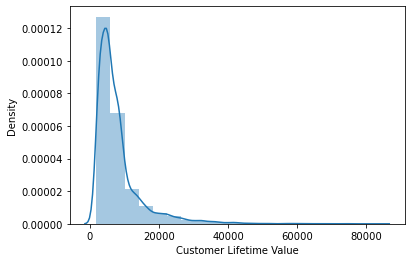

C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


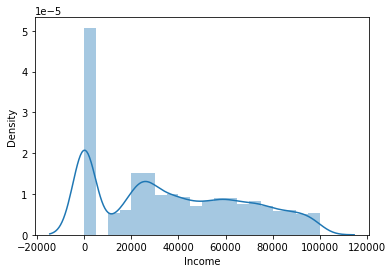

C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


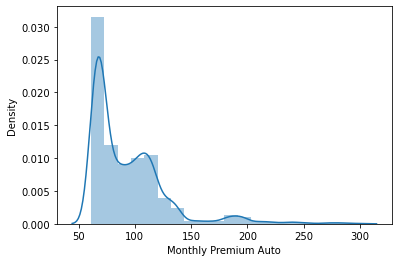

C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


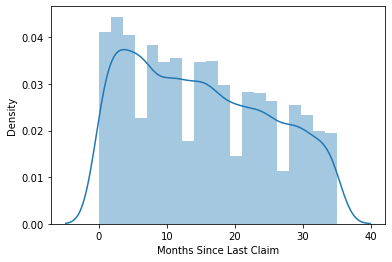

C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


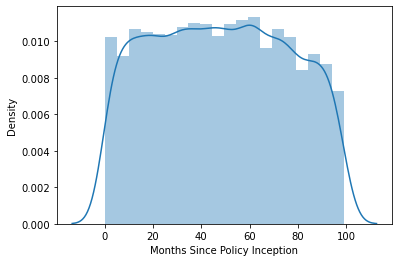

C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


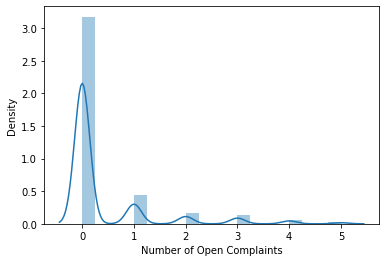

C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


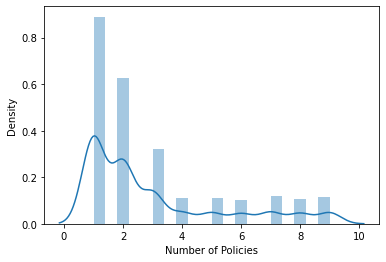

C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


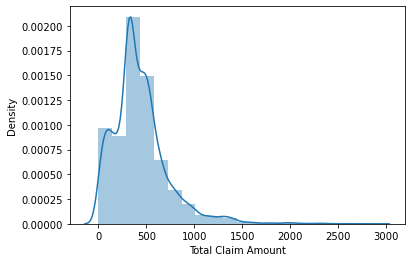

In [29]:
for column in numerical:
    sns.distplot(df[column], bins=20)
    plt.show()

In [11]:
#correlation with the target value

df.corr()['Total Claim Amount']

Customer Lifetime Value          0.226451
Income                          -0.355254
Monthly Premium Auto             0.632017
Months Since Last Claim          0.007563
Months Since Policy Inception    0.003335
Number of Open Complaints       -0.014241
Number of Policies              -0.002354
Total Claim Amount               1.000000
Name: Total Claim Amount, dtype: float64

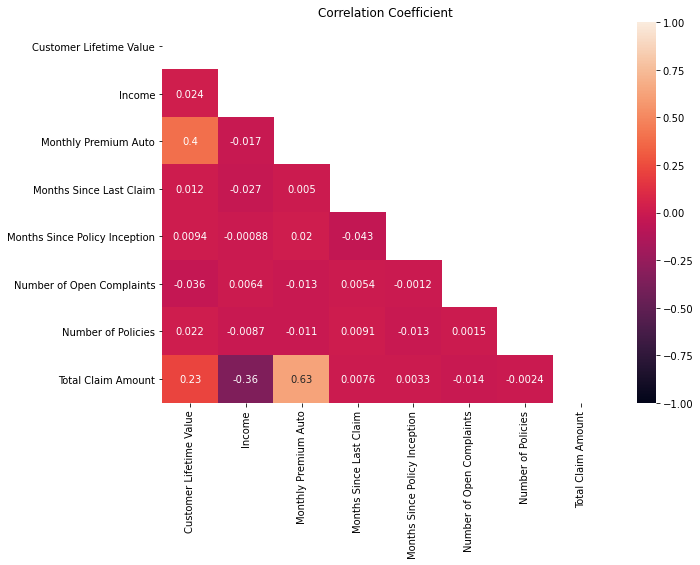

In [12]:
# set figure size
plt.figure(figsize=(10,7))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# generate heatmap
sns.heatmap(df.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient')
plt.show()

### concept of multicollinearity and removing insignificant variables

In [52]:
#removing insignificant variables

# Choose the columns you want to have as your features
feature_list= ['State', 'Customer Lifetime Value','Coverage',
       'Education', 'Employment Status', 'Gender',
       'Income','Monthly Premium Auto', 'Sales Channel',"Total Claim Amount"]

feature_list = df[feature_list]

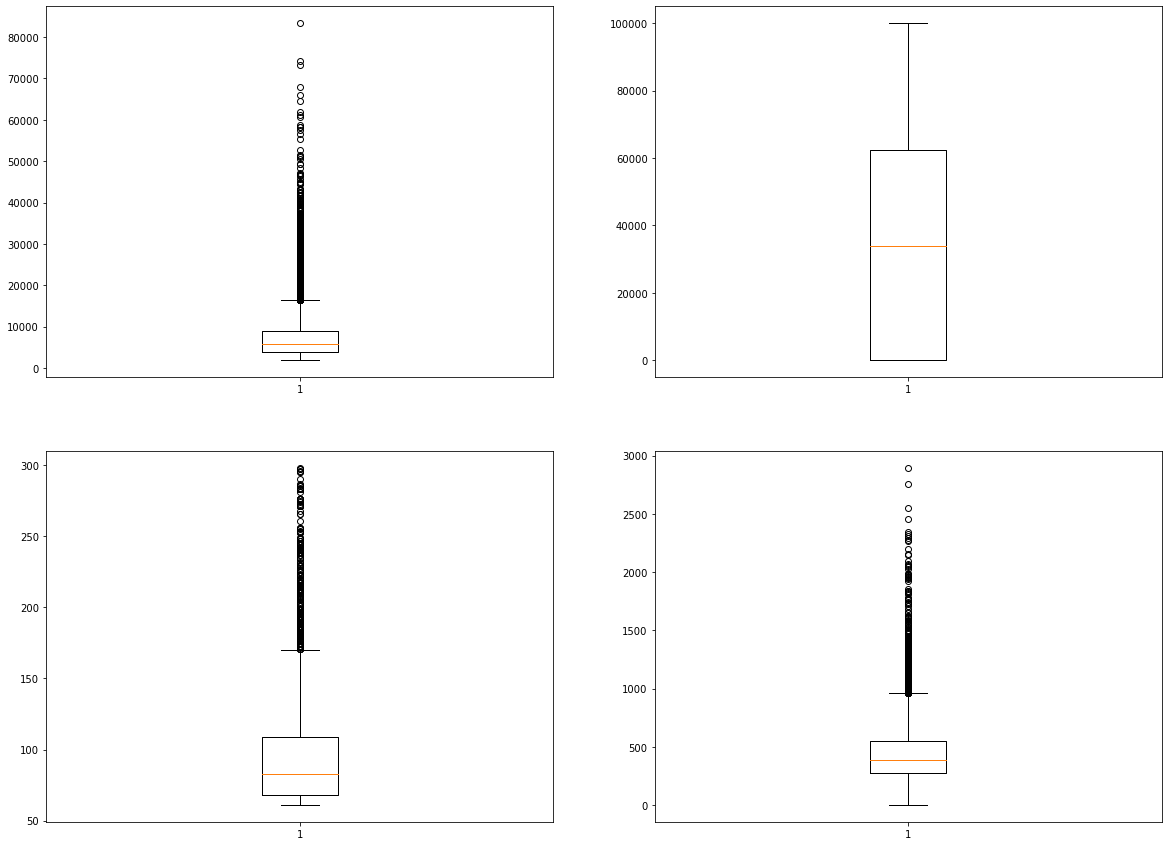

In [53]:
#Checking for outliers

fig, axs = plt.subplots(2, 2, figsize=(20,15))

axs[0, 0].boxplot(feature_list['Customer Lifetime Value'])
axs[0, 1].boxplot(feature_list['Income'])
axs[1, 0].boxplot(feature_list['Monthly Premium Auto'])
axs[1, 1].boxplot(feature_list['Total Claim Amount'])

plt.show()

In [55]:
#Removing the outliers

cols = ['Customer Lifetime Value','Monthly Premium Auto','Total Claim Amount','Income']

Q1 = feature_list[cols].quantile(0.25)
Q3 = feature_list[cols].quantile(0.75)
IQR = Q3 - Q1

feature_list = feature_list[~((feature_list[cols] < (Q1 - 1.5 * IQR)) |(feature_list[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

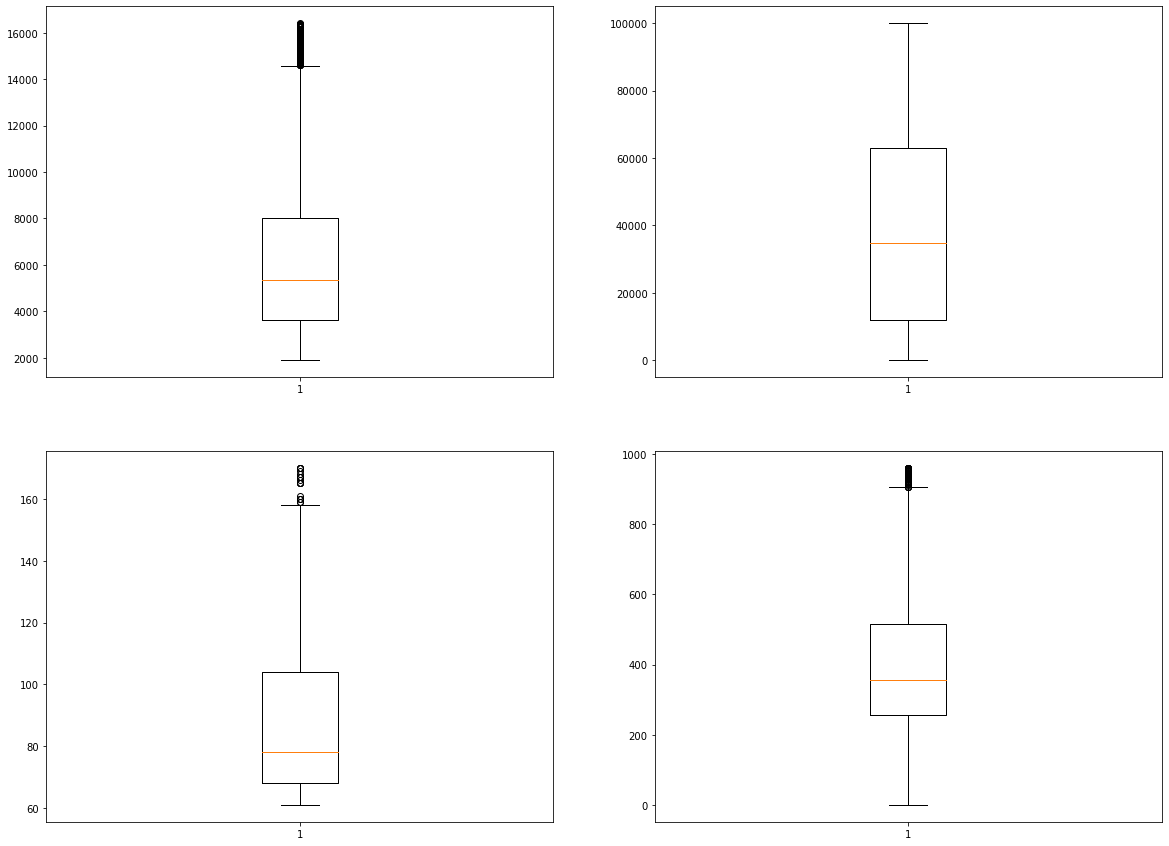

In [56]:
#Checking of look the boxplots after removing the outliers

fig, axs = plt.subplots(2, 2, figsize=(20,15))

axs[0, 0].boxplot(feature_list['Customer Lifetime Value'])
axs[0, 1].boxplot(feature_list['Income'])
axs[1, 0].boxplot(feature_list['Monthly Premium Auto'])
axs[1, 1].boxplot(feature_list['Total Claim Amount'])

plt.show()

In [59]:
feature_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7847 entries, 0 to 9133
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State                    7847 non-null   object 
 1   Customer Lifetime Value  7847 non-null   float64
 2   Coverage                 7847 non-null   object 
 3   Education                7847 non-null   object 
 4   Employment Status        7847 non-null   object 
 5   Gender                   7847 non-null   object 
 6   Income                   7847 non-null   int64  
 7   Monthly Premium Auto     7847 non-null   int64  
 8   Sales Channel            7847 non-null   object 
 9   Total Claim Amount       7847 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 674.4+ KB


In [63]:
# Split beetween explanatory variables and target variable

In [64]:
X = feature_list.iloc[:, :-1]
y= feature_list.iloc[:, -1] #Target feature

In [65]:
X.head()

,State,Customer Lifetime Value,Coverage,Education,Employment Status,Gender,Income,Monthly Premium Auto,Sales Channel
0,Washington,2763.519279,Basic,Bachelor,Employed,F,56274,69,Agent
2,Nevada,12887.431650,Premium,Bachelor,Employed,F,48767,108,Agent
3,California,7645.861827,Basic,Bachelor,Unemployed,M,0,106,Call Center
4,Washington,2813.692575,Basic,Bachelor,Employed,M,43836,73,Agent
5,Oregon,8256.297800,Basic,Bachelor,Employed,F,62902,69,Web


In [66]:
y.head()

0    384.811147
2    566.472247
3    529.881344
4    138.130879
5    159.383042
Name: Total Claim Amount, dtype: float64

State


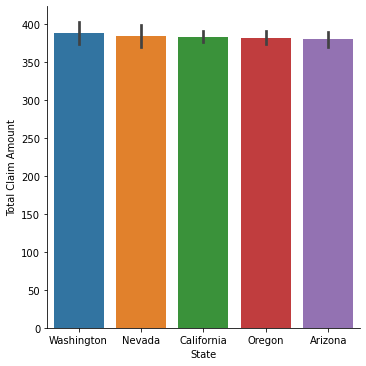

Coverage


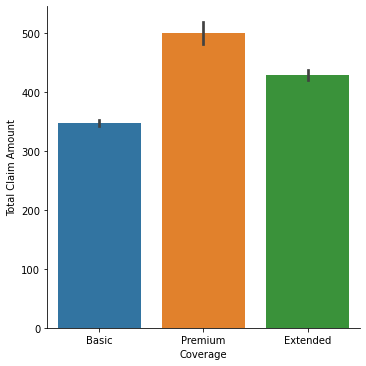

Education


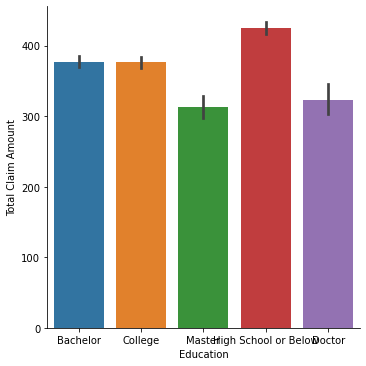

Employment Status


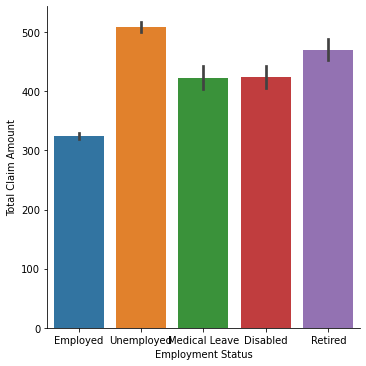

Gender


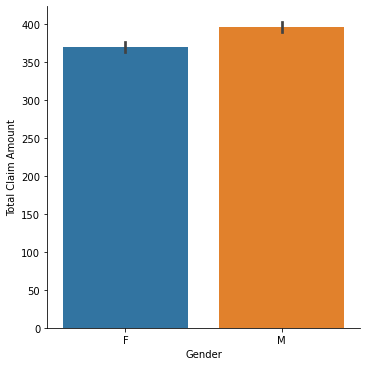

Sales Channel


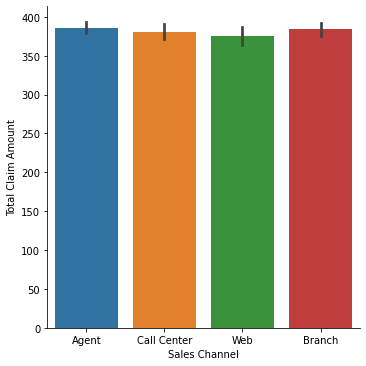

In [67]:
for i in ['State', 'Coverage', 'Education', 'Employment Status', 'Gender', 'Sales Channel']:
    print(i)
    sns.catplot(x = i, y = y, data = X, kind = 'bar')
    plt.show()

Customer Lifetime Value


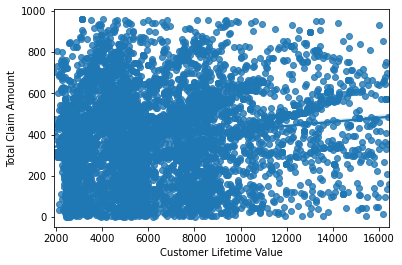

Income


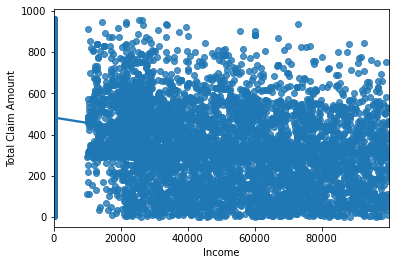

Monthly Premium Auto


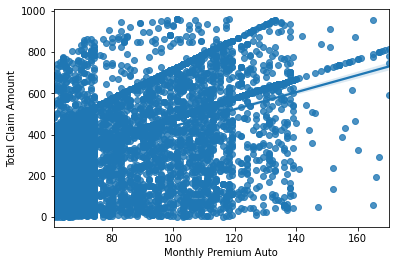

In [68]:
for i in ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto' ]:
    print(i)
    sns.regplot(data=X, x=i, y=y)
    plt.show()

# Dealing with the data

## Transformation of the categorical varible

In [76]:
X = pd.get_dummies(X, drop_first = True)

In [77]:
X.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Coverage_Basic,Coverage_Extended,...,Employment Status_Employed,Employment Status_Medical Leave,Employment Status_Retired,Employment Status_Unemployed,Gender_F,Gender_M,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web
0,2763.519279,56274,69,0,0,0,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
2,12887.431650,48767,108,0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
3,7645.861827,0,106,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
4,2813.692575,43836,73,0,0,0,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
5,8256.297800,62902,69,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1


## Divide dataset Train set & Test set 

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.4, random_state=1)

In [114]:
len(X_train)/len(X)

0.5999745125525678

In [115]:
X_train.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Coverage_Basic,Coverage_Extended,...,Employment Status_Employed,Employment Status_Medical Leave,Employment Status_Retired,Employment Status_Unemployed,Gender_F,Gender_M,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web
3964,3225.395988,29606,81,1,0,0,0,0,0,1,...,1,0,0,0,0,1,1,0,0,0
5834,4328.373176,72531,109,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
8807,5519.513075,70914,68,0,1,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
7944,3071.784639,47528,77,0,0,0,1,0,0,1,...,1,0,0,0,1,0,1,0,0,0
804,4528.737362,90034,112,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,1,0


In [116]:
X_test.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Coverage_Basic,Coverage_Extended,...,Employment Status_Employed,Employment Status_Medical Leave,Employment Status_Retired,Employment Status_Unemployed,Gender_F,Gender_M,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web
5741,2843.557702,67952,71,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
4284,2727.682464,74608,68,0,0,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,1
1305,3609.798318,58297,97,0,1,0,0,0,0,1,...,1,0,0,0,0,1,1,0,0,0
3880,2562.843896,0,74,1,0,0,0,0,1,0,...,0,0,0,1,0,1,1,0,0,0
1048,2517.533581,0,69,1,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0


In [117]:
y_train.head()

3964    438.276898
5834    523.200000
8807     77.695518
7944    277.582137
804     537.600000
Name: Total Claim Amount, dtype: float64

In [118]:
y_test.head()

5741    167.405624
4284    407.683740
1305    647.039443
3880    663.423782
1048     42.096415
Name: Total Claim Amount, dtype: float64

In [120]:
print('Nº of rows of X_train: ', len(X_train))
print('Nº of rows of y_train: ', len(y_train))
print('Nº of rows of X_test: ', len(X_test))
print('Nº of rows of y_test: ', len(y_test))

Nº of rows of X_train:  4708
Nº of rows of y_train:  4708
Nº of rows of X_test:  3139
Nº of rows of y_test:  3139


## Standardisation of the explanative variables

In [121]:
sc_X = StandardScaler()

In [122]:
X_train = sc_X.fit_transform(X_train)
X_test= sc_X.transform(X_test)

In [123]:
X_train

array([[-0.91694753, -0.29575288, -0.22997081, ..., -0.62550216,
        -0.48113781, -0.41826289],
       [-0.56408548,  1.1188276 ,  1.03034646, ..., -0.62550216,
         2.0784066 , -0.41826289],
       [-0.18301862,  1.06553985, -0.81511811, ..., -0.62550216,
        -0.48113781, -0.41826289],
       ...,
       [-0.2180679 , -1.27140972, -1.08518609, ..., -0.62550216,
        -0.48113781, -0.41826289],
       [-0.10175706,  1.42019833, -0.63507278, ..., -0.62550216,
        -0.48113781, -0.41826289],
       [ 0.87799442,  0.83469218,  1.16538045, ...,  1.5987155 ,
        -0.48113781, -0.41826289]])

In [124]:
X_test

array([[-1.03910439,  0.96792803, -0.68008411, ...,  1.5987155 ,
        -0.48113781, -0.41826289],
       [-1.07617494,  1.18727451, -0.81511811, ..., -0.62550216,
        -0.48113781,  2.39084082],
       [-0.79397038,  0.6497504 ,  0.49021049, ..., -0.62550216,
        -0.48113781, -0.41826289],
       ...,
       [-0.80645927,  0.57958985,  0.08510851, ...,  1.5987155 ,
        -0.48113781, -0.41826289],
       [-1.153059  , -0.53549832, -0.99516343, ..., -0.62550216,
        -0.48113781,  2.39084082],
       [ 2.53783283,  1.42665745,  1.30041445, ..., -0.62550216,
        -0.48113781,  2.39084082]])

## Creating the model

In [125]:
# Creating the model

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [126]:
regressor.coef_

array([-2.22273444e+00, -4.23017664e+01,  9.37577271e+01,  1.49530406e+15,
        1.81219865e+15,  1.11677903e+15,  1.71824926e+15,  1.09742121e+15,
        8.36859440e+14,  7.89421925e+14,  4.53084551e+14,  1.82633413e+15,
        1.81607246e+15,  7.77599340e+14,  1.77042986e+15,  1.10732622e+15,
       -3.50518888e+13, -8.18761439e+13, -3.62273942e+13, -2.96956999e+13,
       -7.27281021e+13,  1.18073079e+14,  1.18073079e+14, -1.98243526e+15,
       -1.83449632e+15, -1.59415835e+15, -1.45253416e+15])

In [129]:
#Verifting overfitting
print('Score of Train : ', regressor.score(X_train,y_train))
print('Score of Text : ', regressor.score(X_test, y_test))

Score of Train :  0.3933464168487423
Score of Text :  0.37795140677786976


In [130]:
#evaluating model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

predictions = regressor.predict(X)

rmse = mean_squared_error (y, predictions, squared = False)
mae = mean_absolute_error (y, predictions)

print('R2_score: ', round(regressor.score(X, y), 2))
print ('RMSE: ', rmse)
print ('MAE: ', mae)      

R2_score:  -1.3682777249178994e+26
RMSE:  2394047986366189.0
MAE:  2353947917495654.5
